# Fashion-MNIST 辨識

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## 步驟1：載入資料

In [2]:
import tensorflow as tf

# 載入資料
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [4]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001001100110000110',
 '0000000000001011111000111001',
 '0000000000001011111110000110',
 '0000000000000011111111111111',
 '0000000000010111111111111111',
 '0000000001110111111111111110',
 '0000000000000111111111111110',
 '0000000000000111111111111110',
 '0000000001101111111111111111',
 '0000000000101111111111111111',
 '0000000001001111111111111110',
 '0011111000001111111111111110',
 '0100000001111111111111111110',
 '0000111111111111111111111110',
 '0111111111111111111111111110',
 '1111111111111111111111111110',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '0111111111111111111111111111',
 '0011111111111111111111111110',
 '1000111111111111111111111100',
 '0000000111111000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [6]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000010000111111111100000000',
 '0001000111111111111111100000',
 '0000011111111111111111110000',
 '0000011111111111111111111000',
 '0000111111111111111111111000',
 '0000111111111111111111111000',
 '0000111111011011111011111100',
 '0000111111011111111011111100',
 '0001111111011111111011111100',
 '0001111111111111111111111100',
 '0001111111111111111111111100',
 '0000011111111111111111000000',
 '0000000111111111111111000000',
 '0000110111111111111111011000',
 '0000010111111111111111010000',
 '0000010111111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111000000',
 '0000000011111111111111010000',
 '0000010011111111111111000000']

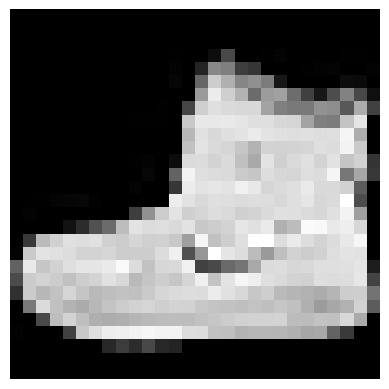

In [7]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

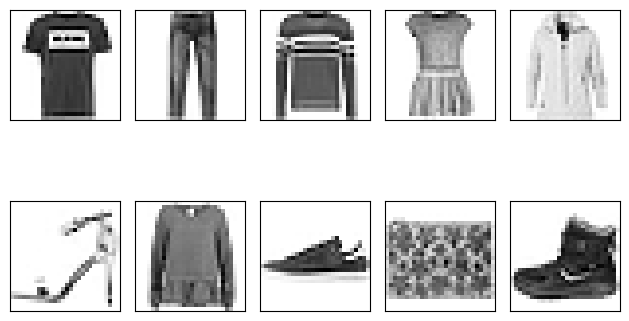

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

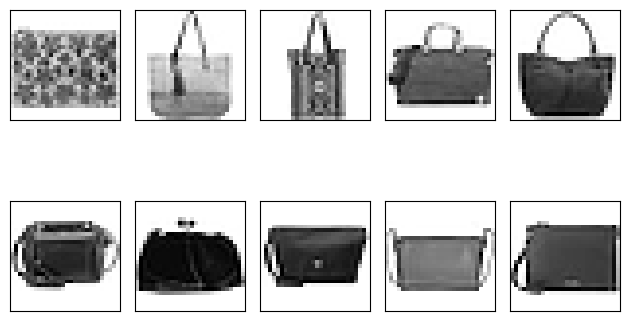

In [9]:
no=8
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [10]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [11]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [13]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5526 - accuracy: 0.8050 - val_loss: 0.4239 - val_accuracy: 0.8448
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4081 - accuracy: 0.8522 - val_loss: 0.3769 - val_accuracy: 0.8623
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3715 - accuracy: 0.8643 - val_loss: 0.3630 - val_accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3490 - accuracy: 0.8717 - val_loss: 0.3419 - val_accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3325 - accuracy: 0.8787 - val_loss: 0.3442 - val_accuracy: 0.8770


In [14]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

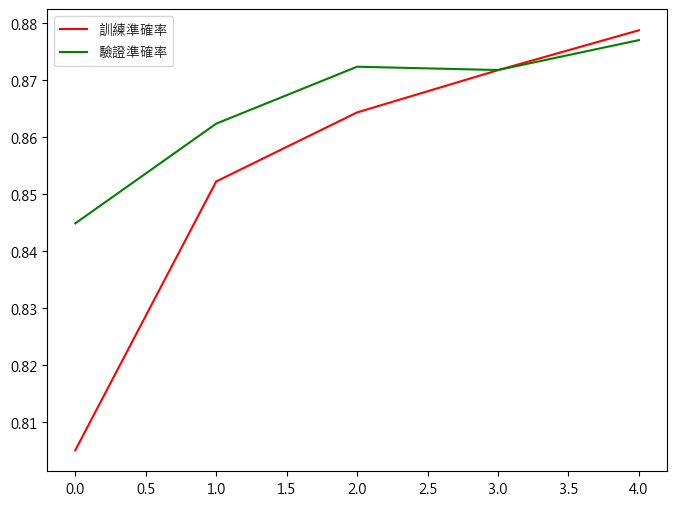

In [15]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

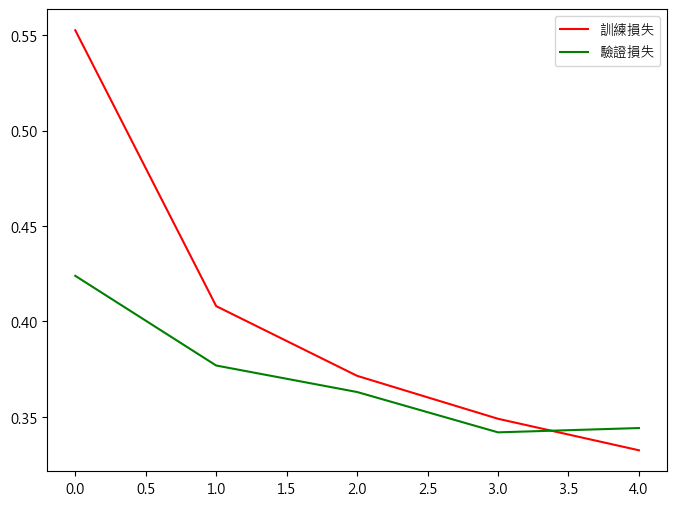

In [16]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [17]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.3711
accuracy: 0.8676


In [18]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 [==============================] - 1s 2ms/step
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
prediction: [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0]


In [19]:
# 顯示第 18 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[17:18])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 [==============================] - 0s 24ms/step
0~9預測機率: [[0.   0.   0.51 0.   0.21 0.   0.29 0.   0.   0.  ]]


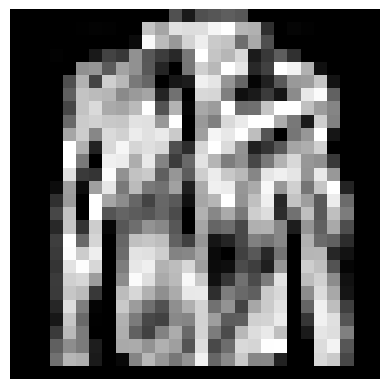

In [20]:
# 顯示第 9 筆圖像
X2 = x_test[17,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [21]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 步驟10：新資料預測

In [26]:
# 讀取影像並轉為單色
import os
from skimage import io
from skimage.transform import resize
import numpy as np

label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

path1 = './FashionMnist_test_data'
for i in os.listdir(path1):
    uploaded_file = f'{path1}/{i}'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    print(f'{i}：{predictions[0]} {label_dict[predictions[0]]}')

bag1.jpg：8 Bag
Sandal1.jpg：2 Pullover
shirt1.jpg：6 Shirt
t-shirt.jpg：0 T-shirt/top


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [26]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,851,0,20,33,4,1,82,0,9,0
1,1,958,2,28,5,0,3,0,3,0
2,23,0,766,6,165,0,37,0,3,0
3,20,4,21,890,41,0,20,0,4,0
4,1,0,72,21,863,0,42,0,1,0
5,0,0,0,1,0,967,0,21,1,10
6,145,0,111,35,89,0,601,0,19,0
7,0,0,0,0,0,29,0,944,0,27
8,3,0,3,5,6,3,4,2,974,0
